In [6]:
import pandas as pd



In [9]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/amazon-sales-dataset/Amazon 2_Raw.xlsx


In [13]:
df = pd.read_excel('/kaggle/input/amazon-sales-dataset/Amazon 2_Raw.xlsx')


In [14]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

print(df.isnull().sum())


Order ID         0
Order Date       0
Ship Date        0
EmailID          0
Geography        0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
Shipping Days    0
dtype: int64


In [16]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_shipping_days = df['Shipping Days'].mean()
top_category = df.groupby('Category')['Sales'].sum().idxmax()

print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Total Profit: ₹{total_profit:,.2f}")
print(f"Average Shipping Days: {avg_shipping_days:.2f}")
print(f"Top-Selling Category: {top_category}")


Total Sales: ₹725,457.82
Total Profit: ₹108,418.45
Average Shipping Days: 3.93
Top-Selling Category: Chairs


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Chairs'),
  Text(1, 0, 'Phones'),
  Text(2, 0, 'Tables'),
  Text(3, 0, 'Storage'),
  Text(4, 0, 'Accessories'),
  Text(5, 0, 'Binders'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Machines'),
  Text(8, 0, 'Bookcases'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Furnishings'),
  Text(11, 0, 'Paper'),
  Text(12, 0, 'Supplies'),
  Text(13, 0, 'Art'),
  Text(14, 0, 'Labels'),
  Text(15, 0, 'Envelopes'),
  Text(16, 0, 'Fasteners')])

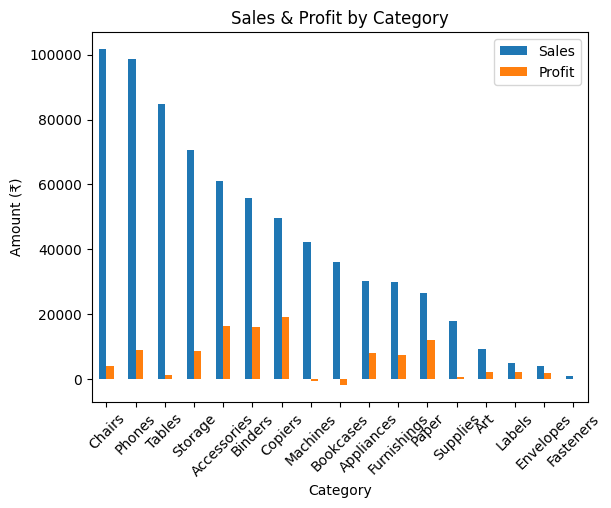

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

category_sales = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
category_sales.plot(kind='bar')
plt.title('Sales & Profit by Category')
plt.ylabel('Amount (₹)')
plt.xticks(rotation=45)


<Axes: title={'center': 'Top 10 Profitable Products'}, ylabel='Product Name'>

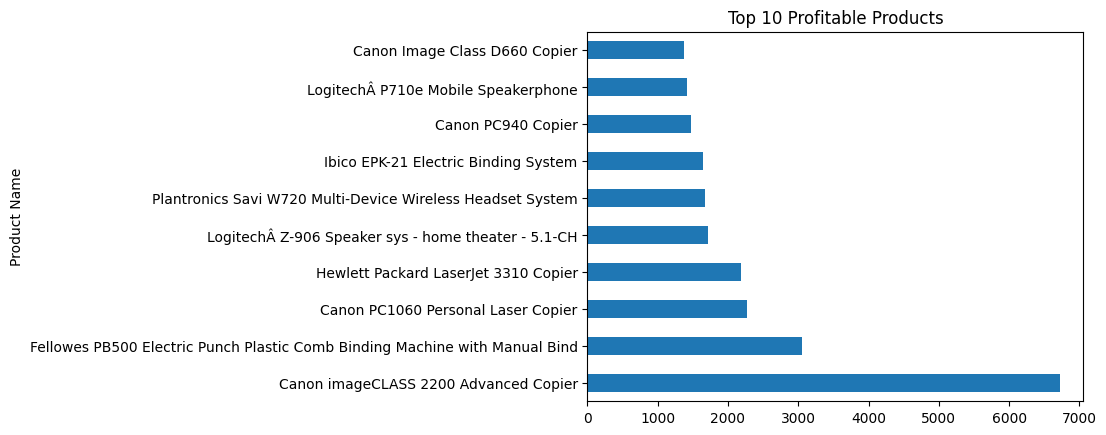

In [18]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Profitable Products')


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Order Month'>

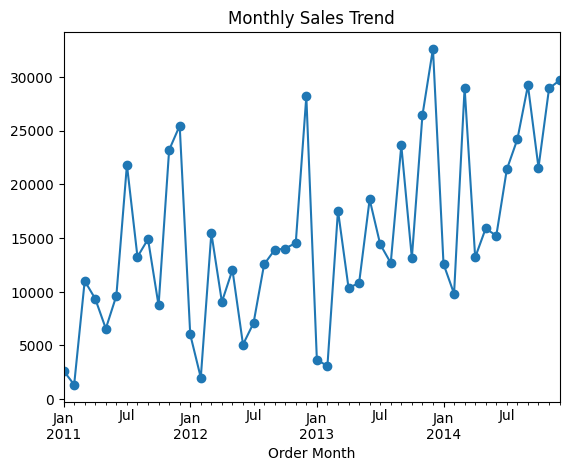

In [19]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.plot(marker='o', title='Monthly Sales Trend')
